<h1 style="text-align:center;">Introdução à Otimização &ndash; Professor Amit Bhaya &ndash; 2022/2</h1>
<h2 style="text-align:center;">Lista 1</h2>
<h2 style="text-align:center;">Entrega: 03 de outubro de 2022

In [30]:
@time using Clp
@time using JuMP

using Plots
using JuMP
using Clp
using LinearAlgebra

  0.001635 seconds (424 allocations: 26.562 KiB)
  0.001853 seconds (424 allocations: 26.562 KiB)


In [ ]:
versioninfo()

## Problema 1: (Forma padrão de um programa linear) 

Considere o problema de otimização abaixo:

$$
\begin{array}{rlr}
\max & 4x_1 - 2x_2 + x_3 &\\
& -x_1 + 3x_2 - x_3 & \geq -1 \\
& 5x_2 + 3x_3 & = 5\\
& x_1 + x_2 + x_3 & \leq 1 \\
& x_2 & \geq -1 \\
& x_3 & \geq -2 \\
& x_3 & \leq 2
\end{array}
$$

 - Resolva o programa linear (PL), utilizando JuMP/Julia.
 - Transforme o PL abaixo à forma padrão $\max {c}^\top {x}$, sujeito a ${Ax}\leq {b}, {x}\geq 0$. Resolva de novo em JuMP, utilizando a forma padrão matricial. Compare as duas soluções obtidas.

### Solução do problem 1: Insira sua solução na célula abaixo!

In [132]:
m = Model(Clp.Optimizer)             #  b ≥      A    x

@variable(m, x1 >=  0)               #  0 ≥ [-1  0  0]x
@variable(m, x2 >= -1)               #  1 ≥ [ 0 -1  0]x
@variable(m, x3 >= -2)               #  2 ≥ [ 0  0 -1]x

@constraint(m, x3 <=  2)             #  2 ≥ [ 0  0  1]x
@constraint(m, -x1 +3x2 - x3 >= -1)  #  1 ≥ [ 1 -3  1]x

@constraint(m, 5x2 + 3x3 == 5)       # -5 = [ 0 -5 -3]x

@constraint(m, x1 + x2 + x3 <=  1)   #  1 ≥ [ 1  1  1]x

@objective(m, Max, 4x1 -2x2 + x3)
optimize!(m)

println("x1 = ", JuMP.value.(x1) )
println("x2 = ", JuMP.value.(x2) )
println("x3 = ", JuMP.value.(x3) )

x1 = 0.0
x2 = 1.0
x3 = 0.0
Coin0506I Presolve 2 (-2) rows, 2 (-1) columns and 4 (-5) elements
Clp0006I 0  Obj -1.78 Primal inf 0.039999008 (1) Dual inf 3.999999 (1)
Clp0006I 1  Obj -2
Clp0000I Optimal - objective value -2
Coin0511I After Postsolve, objective -2, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -2 - 1 iterations time 0.002, Presolve 0.00


In [31]:
c = [ 4;-2; 1]

A = [-1  0  0; 0 -1  0; 0  0 -1; 0  0  1; 1 -3  1; 0 -5 -3; 0  5  3; 1  1  1]

b = [ 0; 1; 2; 2; 1;-5; 5; 1]

m = Model(Clp.Optimizer)
@variable(m, x[1:3] >= 0 ) # x = [x1;x2;x3]

@constraint(m, A*x .<= b )
@objective(m, Max, dot(c,x) )

optimize!(m)

println("x1 = ", JuMP.value.(x[1]) )
println("x2 = ", JuMP.value.(x[2]) )
println("x3 = ", JuMP.value.(x[3]) )


x1 = 0.0
x2 = 1.0
x3 = 0.0
Coin0506I Presolve 3 (-5) rows, 3 (0) columns and 7 (-7) elements
Clp0006I 0  Obj -1.7798445 Primal inf 0.22015347 (2) Dual inf 4.999998 (2)
Clp0006I 3  Obj -2
Clp0000I Optimal - objective value -2
Coin0511I After Postsolve, objective -2, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -2 - 3 iterations time 0.062, Presolve 0.06


## Problema 2: (Solução gráfica de um PL)

Desenhe a região viável do seguinte PL e encontre o valor mínimo graficamente.
$$
\begin{array}{rlr}
\max & 2x + 3y &   \\
& -3x + y & \leq 2 \\
& 4x + 2y & \leq 44 \\
& 4x - y & \leq 20 \\
&- x+ 2y & \leq 14 \\
& 0      & \leq x, y
\end{array}
$$
Agora resolva o mesmo problema no JuMP e compare as soluções.

### Solução do problema 2: Insira sua solução na célula abaixo!

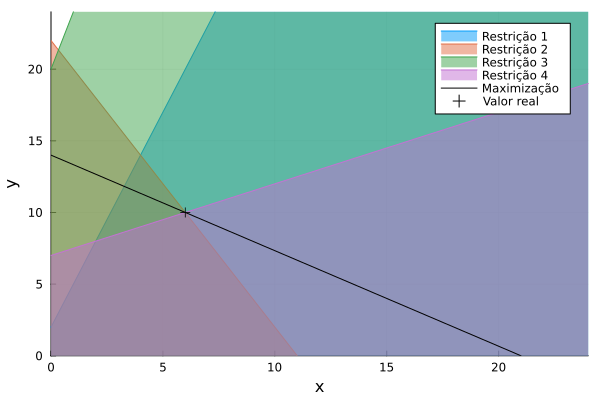

In [97]:
function new_plot()
  plot(xlabel = "x", ylabel = "y",
      xlims = (0, 24), ylims = (0, 24)) # Implicit x,y > 0
end 

y1(x) = ( 3x +  2 )      # -3x +  y ≤  2
y2(x) = (-4x + 44 ) / 2  #  4x + 2y ≤ 44
y3(x) = ( 4x + 20 )      #  4x -  y ≤ 20
y4(x) = (  x + 14 ) / 2  # - x + 2y ≤ 14

l1(x) = (-2x + 42 ) / 3

p = new_plot()

plot!(p, y1, fill=(0, 0.5, :auto), label="Restrição 1")
plot!(p, y2, fill=(0, 0.5, :auto), label="Restrição 2")
plot!(p, y3, fill=(0, 0.5, :auto), label="Restrição 3")
plot!(p, y4, fill=(0, 0.5, :auto), label="Restrição 4")
plot!(p, l1, label="Maximização", line=(1, :black, :solid))

scatter!(p, [6], [10], label = "Valor real", marker=(:cross, :black , 5))

In [32]:
c = [ 2; 3]

A = [-3  1; 4  2; 4 -1;-1  2]

b = [ 2;44;20;14]

m = Model(Clp.Optimizer)
@variable(m, x[1:2] >= 0 ) # x = [x;y]

@constraint(m, A*x .<= b )
@objective(m, Max, dot(c,x) )

optimize!(m)

println("x = ", JuMP.value.(x[1]) )
println("y = ", JuMP.value.(x[2]) )

x = 6.0
y = 10.0
Coin0506I Presolve 4 (0) rows, 2 (0) columns and 8 (0) elements
Clp0006I 0  Obj 0 Dual inf 4.9999998 (2)
Clp0006I 2  Obj 42
Clp0000I Optimal - objective value 42
Clp0032I Optimal objective 42 - 2 iterations time 0.002


## Problema 3: (Poliedro convexo como conjunto viável $\{x: Ax \leq b\}$ )

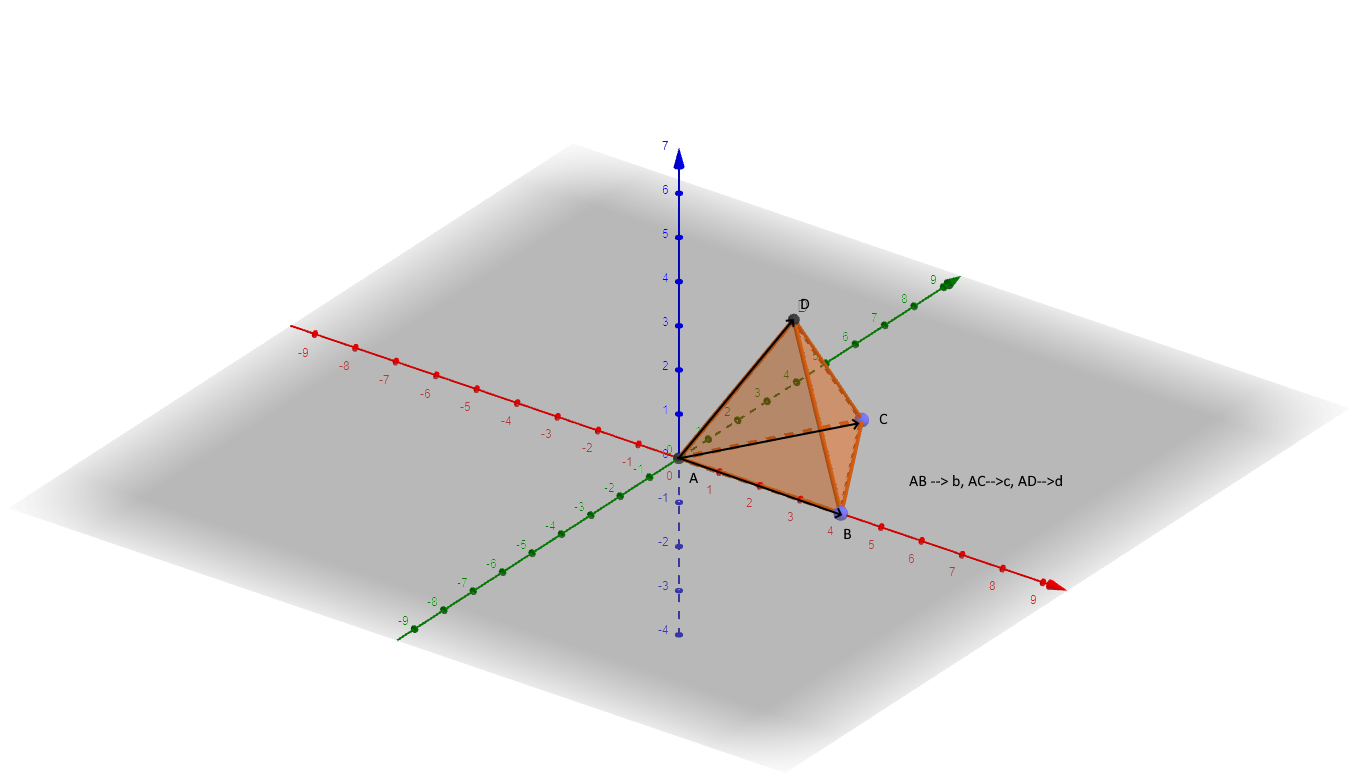
Foi visto em sala de aula que, para qualquer matriz $A \in R^{m \times n}$, $b \in R^m, x \in R^n$, o conjunto $\{x : Ax \leq b\}$ é um poliedro convexo. Este exercício pede para investigar o caminho inverso.
O tetraedro da figura acima possui vértices $A = (0,0,0)$, $B= (4,0,0)$, $C=(2,3.46,0)$ e $D= (2,1.15,3.27)$. Você consegue representá-lo na forma de um conjunto $\{x : Ax \leq b\}$? Caso afirmativo, mostre os cálculos levando à matriz $A$ e ao vetor $b$.

- Sugestão: Como o ponto $A$ está na origem, denotamos por $b,c,d$ os vetores $AB,AC,AD$. Três das quatro faces do tetraedro são combinações convexas de pares distintos dos vetores $b,c,d$, i.e., dos pares $\{b,c\}$, $\{b,d\}$ e $\{c,d\}$. A quarta face $BCD$ requer um pouco mais de trabalho...

### Solução do problema 3: Insira sua solução na célula abaixo!

In [83]:
# Points on three dimensional space
A = [ 0    ; 0    ; 0    ]
B = [ 4    ; 0    ; 0    ]
C = [ 2    ; 3.46 ; 0    ]
D = [ 2    ; 1.15 ; 3.27 ]

# Vectos or edges of the polyhedra
AB = [ B[i] - A[i] for i in 1:3 ]
AC = [ C[i] - A[i] for i in 1:3 ]
AD = [ D[i] - A[i] for i in 1:3 ]

BC = [ C[i] - B[i] for i in 1:3 ]
BD = [ D[i] - B[i] for i in 1:3 ]

# Angular coefficients
ABD = cross(AB, AD)
ADC = cross(AD, AC)
ACB = cross(AC, AB)

BCD = cross(BC, BD)

# Linear coefficients
b = [ dot(ABD, B) ; dot(ADC, D) ; dot(ACB, C) ; dot(BCD, C) ]

# Mx ≤ b
M = [ transpose(ABD) ; transpose(ADC) ; transpose(ACB) ; transpose(BCD) ]

display(M)
display(b)


4×3 Matrix{Float64}:
   0.0     -13.08    4.6
 -11.3142    6.54    4.62
   0.0       0.0   -13.84
  11.3142    6.54    4.62

4-element Vector{Float64}:
  0.0
  0.0
  0.0
 45.2568

## Problema 4: (Solução gráfica de PL parametrizado)

Encontre graficamente todos os valores do parâmetro $a$ tais que $(-3,4)$ seja a solução ótima do seguinte PL:
\begin{array}{rl}
    \text{maximize} & ax_1 + (2-a)x_2  \\
    \text{sujeito a}& 4x_1 + 3x_2 \leq 0 \\
              & 2x_1 + 3x_2       \leq 7 \\
              & x_1  + x_2        \leq 1
\end{array}
Verifique sua solução com código em JuMP.

### Solução do problema 4: Insira sua solução na célula abaixo!

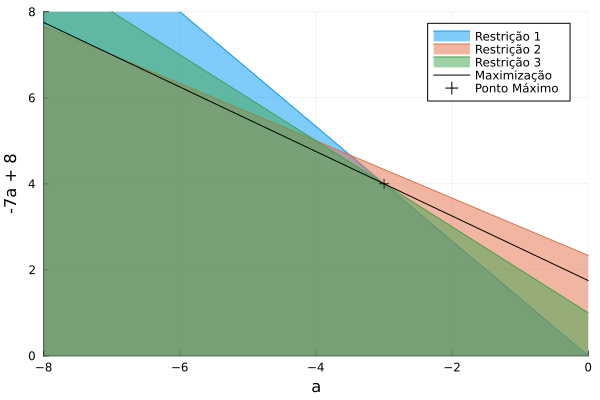

In [124]:
function new_plot()
  plot(xlabel = "a", ylabel = "-7a + 8",
      xlims = (-8, 0), ylims = (0, 8)) # Implicit x1,x2 > 0
end 

y1(x1) = (-4x1 +  0 ) / 3  #  4x1 + 3x2 ≤  0
y2(x1) = (-2x1 +  7 ) / 3  #  2x1 + 3x2 ≤  7
y3(x1) = (- x1 +  1 )      #   x1 +  x2 ≤  1

l1(x1) = (-3x1 + 7 ) / 4

p = new_plot()

plot!(p, y1, fill=(0, 0.5, :auto), label="Restrição 1")
plot!(p, y2, fill=(0, 0.5, :auto), label="Restrição 2")
plot!(p, y3, fill=(0, 0.5, :auto), label="Restrição 3")
plot!(p, l1, label="Maximização", line=(1, :black, :solid))

# (x1, x2) = (-3, 4)
scatter!(p, [-3], [4], label = "Ponto Máximo", marker=(:cross, :black , 5))

## Problema 5 (Gerenciamento de processo): 

O produto de uma usina química é uma composição de dois produtos químicos, 1 and 2, na proporção 5:2 por peso. Estes produtos químicos, por sua vez, podem ser produzidos por três processos diferentes, utilizando duas matérias primas e combustível. Dados referentes à produção estão na tabela mostrada na célula abaixo. Por quanto tempo cada processo deve ser utilizado para maximizar a produção total (da composição) da usina?

|    Processo    |  Materia prima 1 (m)  |  Materia prima 2 (n)  |  Combustivel (c)  |  Quimico 1 (q)  |  Quimico 2 (p)  |
| :------------: | :-------------------: | :-------------------: | :---------------: | :-------------: | :-------------: |
|       1        |           9           |           5           |        50         |        9        |        6        |
|       2        |           6           |           8           |        75         |       12        |        4        |
|       3        |           4           |          11           |        100        |       10        |        6        |
| **Quantidade** |          200          |          400          |       1850        |                 |                 |

### Solução do problem 5: Insira sua solução na célula abaixo!

In [127]:

m = Model(Clp.Optimizer)  

@variable(m, p1 ≥ 0)          # p1 = processo 1
@variable(m, p2 ≥ 0)          # p2 = processo 2
@variable(m, p3 ≥ 0)          # p3 = processo 3

@constraint(m,  9p1 +  6p2 +   4p3 ≤  200)
@constraint(m,  5p1 +  8p2 +  11p3 ≤  400)
@constraint(m, 50p1 + 75p2 + 100p3 ≤ 1850)

@objective(m, Max, 5(9p1 + 12p2 + 10p3) + 2(6p1 + 4p2 + 6p3))

optimize!(m)

println("Processo 1 = ", JuMP.value.(p1) )
println("Processo 2 = ", JuMP.value.(p2) )
println("Processo 3 = ", JuMP.value.(p3) )

Processo 1 = 10.4
Processo 2 = 17.733333333333334
Processo 3 = 0.0
Coin0506I Presolve 3 (0) rows, 3 (0) columns and 9 (0) elements
Clp0006I 0  Obj 0 Dual inf 209.66667 (3)
Clp0006I 2  Obj 1798.6667
Clp0000I Optimal - objective value 1798.6667
Clp0032I Optimal objective 1798.666667 - 2 iterations time 0.002


## Problema 6 (Produção de vinho)
Um produtor de vinho produz dois tipos de vinho, suave (V) e seco (S),  obtendo 5 reais de lucro por litro de vinho suave e 4 reais por litro de vinho seco. Vinho suave requer 3 caixas de uvas, 4 kg de açúcar e 2 unidades de extrato por litro. Vinho seco requer 4 caixas de uvas, 3 kg de açúcar e 1 unidade de extrato por litro. Ele possui 14 caixas de uvas, 8 kg de açúcar e 6 unidades de extrato e quer utilizar estes insumos para maximizar seu lucro. 
1. Formule o problema e ajude o produtor a determinar o esquema de produção ótimo. 
2. Mantendo este esquema ótimo:
    - determine a variação de preço por litro de vinho seco que ele pode admitir sem ter prejuízo. 
    - determine o número mínimo de caixas de uva ele necessita para continuar lucrando.
3. Supondo que, no problema original, o vinho suave passa a requerer $7\frac{1}{2}$ unidades de extrato. Analise a sensibilidade da solução ótima diante desta mudança.

### Solução do problem 6: Insira sua solução na célula abaixo!

In [118]:
# 1) Problema inicial otimo
m = Model(Clp.Optimizer)  

@variable(m, v ≥ 0)          # v = vinho suave
@variable(m, s ≥ 0)          # s = vinho seco

@constraint(m, 3v + 4s ≤ 14)
@constraint(m, 4v + 3s ≤  8)
@constraint(m, 2v + 1s ≤  6)

@objective(m, Max, 5v + 4s)

optimize!(m)

println("Vinho suave = ", JuMP.value.(v) )
println("Vinho seco = ", JuMP.value.(s) )

Vinho suave = 0.0
Vinho seco = 2.6666666666666665
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 8.9999998 (2)
Clp0006I 1  Obj 10.666667
Clp0000I Optimal - objective value 10.666667
Clp0032I Optimal objective 10.66666667 - 1 iterations time 0.002


In [154]:
# 2) Variacao admissivel para o preco do vinho seco
m = Model(Clp.Optimizer)  

@variable(m, u ≥ 0)          # u = caixas de uvas
@variable(m, a ≥ 0)          # a = açucar
@variable(m, e ≥ 0)          # e = extrato

@constraint(m, 3u + 4a + 2e ≥ 5)
@constraint(m, 4u + 3a + 1e ≥ 4)

@objective(m, Min, 14u + 8a + 6e)

optimize!(m)

println("Caixas de uva = ", JuMP.value.(u) )
println("Açucar = ", JuMP.value.(a) )
println("Extrato = ", JuMP.value.(e) )

Caixas de uva = 0.0
Açucar = 1.3333333333333333
Extrato = 0.0
Coin0506I Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Primal inf 2.2499998 (2)
Clp0006I 2  Obj 10.666667
Clp0000I Optimal - objective value 10.666667
Clp0032I Optimal objective 10.66666667 - 2 iterations time 0.012


In [125]:
# 3) Vinho suave requer mais extrato
m = Model(Clp.Optimizer)  

@variable(m, v ≥ 0)          # v = vinho suave
@variable(m, s ≥ 0)          # s = vinho seco

@constraint(m, 3v + 4s ≤ 14)
@constraint(m, 4v + 3s ≤  8)
@constraint(m, 7.5v + 1s ≤  6)

@objective(m, Max, 5v + 4s)

optimize!(m)

println("Vinho suave = ", JuMP.value.(v) )
println("Vinho seco = ", JuMP.value.(s) )
println("Nenhuma alteração")

Vinho suave = 0.0
Vinho seco = 2.666666666666666
Nenhuma alteração
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 5.2898433 (2)
Clp0006I 2  Obj 10.666667
Clp0000I Optimal - objective value 10.666667
Clp0032I Optimal objective 10.66666667 - 2 iterations time 0.002


## Problema 7 (Escalação de entrevistas)

A empresa startup Doodle quer agendar entrevistas para um candidato para a posição de engenheiro de software.

O dia de trabalho disponível, entre 10 e 15h, está dividido em  intervalos de 20 minutos que podem ser utilizados para entrevistas individuais.

Também há um intervalo de uma hora no meio do dia quando 3 pesquisadores levam o candidato para o almoço.

Idealmente todos os 15 pesquisadores da empresa deveriam ter um encontro (almoço ou entrevista) com o candidato durante o dia, mas como todos tem agendas cheias, não está claro que isto seria possível.

Como primeiro passo, foi feita uma enquete com os 15 pesquisadores para saber da disponibilidade de cada um.

O resultado está mostrado na tabela abaixo, na qual um elemento um (1) em uma célula indica disponibilidade no horário associado à célula, e um zero (0) indica indisponibilidade.

Determinar se  existe um agendamento viável e,  caso afirmativo, gerar uma agenda para o candidato, indicando qual pesquisador encontraria em qual intervalo.

### Solução do problem 7: Insira sua solução na célula abaixo!

## Problema 8 (Grid elétrico com armazenamento de energia)

A cidade Varre-Sai compra sua energia elétrica da utilidade Ampla que cobre por hora. Se for utilizado menos de 50MWh durante uma determinada hora do dia,  o custo é 100 reais por MWh. Qualquer excedente (além de 50 MWh) durante esta hora custa 400 reais por MWh. A energia máxima que Ampla pode fornecer (em qualquer intervalo de uma hora) é 75 MWh. As tabelas abaixo mostram a demanda diária média hora a hora para a cidade Varre-Sai durante o mes de janeiro.

| Hora do dia (manhã) | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10| 11| 12|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 43| 40| 36| 36| 35| 38| 41| 46| 49| 48| 47| 47|

| Hora do dia ( tarde )| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 48| 46| 45| 47| 50| 63| 75| 75| 72| 66| 57| 50|

O prefeito de Varre-Sai está preocupado com o gasto alto na parte da tarde e o risco de blecautes por volta de 19h por conta da demanda média alta (perigosamente) próxima ao limite de 75 MWh estipulado pela Ampla.

Para contornar estes problemas potenciais, o prefeito comprou uma bateria grande com capacidade de armazenamento de 30 MWh. A ideia seria comprar mais energia (do que a demanda na primeira parte do dia, quando energia custa menos), armazenar na bateria e utilizar nos horários de pico mais tarde, quando tanto a demanda como o preço atingem valores altos.
1. Quanto dinheiro a cidade de Varre-Sai poderia economizar graças a bateria? Suponha que a bateria começa o dia completamente descarregada, e que, para maior segurança em relação aos  blecautes, limita-se a 65 MWh a quantidade de eletricidade comprada por hora.
2. Quanto dinheiro seria economizado se a bateria tivesse capacidade infinita?
3. Plote um gráfico que mostra:
     1. a demanda de energia típica (da tabela) versus a hora do dia.
     2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).

### Solução do problem 8: Insira célula com a sua solução!

In [140]:
consumo = [43 40 36 36 35 3 8 41 46 49 48 47 47 48 46 45 47 50 63 75 75 72 66 57 50]

custo = 0
for c in consumo
  if c ≤ 50
    custo += 100c
  else 
    custo += 5000 + 400(c - 50)
  end
end

println("Custo atual: R\$ ", custo)

Custo atual: R$ 149700


## Problema 9 (Construção de um estádio esportivo [sob regime de anti-propina!])
Uma cidade pequena deseja construir um estádio (também pequeno). Após licitação, uma empreiteira ganha o contrato e deseja cumprir a tarefa no menor tempo possível. Todas as grandes tarefas estão listadas na tabela abaixo. Algumas podem ser iniciadas apenas quando as tarefas predecessoras tiverem sido concluídas e esta dependência está registrada na quarta coluna.

|Tarefa | Descrição | Duração (em semanas)| Tarefas predecessoras | Redução máxima (em semanas)| Custo da redução (R\$1k/semana) |
|:---:|:----------:|:------------------:|:------------:|:---------------------------:|:---------------------------:|
|1 |Instalação no local de construção |2 | não há | 0 | -- |
| 2| Terraplenagem | 16 | 1 | 3 | 30 |
|3 |Construção da fundação | 9 | 2 | 1 | 26 |
| 4 |Ruas de acesso e outras redes | 8 | 2 | 2 | 12 |
| 5 | Construir o porão | 10 | 3 | 2 | 17 |
| 6 | Piso principal | 6 | 4,5 | 1 | 15 |
| 7 | Divisão do vestiário | 2 | 4 | 1 | 8 |
| 8 | Instalação elétrica nas arquibancadas | 2 | 6 | 0 | -- |
|9  | Construção da cobertura | 9 | 4,6 | 2 | 42 |
|10 | Iluminação do estádio | 5 | 4 | 1 | 21 |
| 11 | Instalações nas arquibancadas | 3 | 6 | 1 |18 |
| 12 | Impermeabilização da cobertura | 2 | 9 | 0 | -- |
| 13 | Acabamento do vestiário | 1 | 7 | 0 | -- |
| 14 | Construção da bilheteria | 7 | 2 | 2 | 22 |
| 15 | Ruas de acesso secundárias | 4 | 4,14 | 2 | 12 |
|16  | Placar e altofalantes |3 | 8,11,14 | 1 | 6 |
|17 | Gramado e acessórios para esportes | 9 | 12 | 3 | 16 |
|18 | Entrega do estádio | 1 | 17 | 0 | -- |

As perguntas que a empreiteira quer que sejam respondidas são as seguintes:
1. Qual a data mais cedo para o término da construção? Note que as últimas duas colunas não são  relevantes para este item. 
2. Para algumas tarefas a empreiteira pode contratar operários extra e alugar mais equipamento para reduzir o tempo total. As últimas duas colunas mostram o número máximo de semanas poupadas por tarefa e o custo adicional associado por semana, por conta do trabalho extra. Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.
3. A prefeitura da cidade gostaria que a obra fosse terminada antes da data combinada e anunciada (resposta do item  1). Como incentivo, a prefeitura propõe pagar um bônus de R\$30k por cada semana de antecipação da data de término da obra. Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

### Solução do problem 9: Insira sua solução na célula abaixo!

## Problema 10: (Clássico: dieta ótima)

Suponha que uma certa dieta alimentar esteja baseada nos alimentos (em parêntesis vemos as unidades utilizadas): 
leite desnatado (litro) , carne magra de boi (Kg), carne de frango (kg) e batata doce (100 g). 
Sabendo-se que os requisitos nutricionais serão expressos em termos de vitaminas A,C, e D e controlados por 
suas quantidades mínimas (em miligramas), uma vez que são indispensáveis à preservação da saúde da pessoa 
que estará se submetendo a dieta. A Tabela abaixo resume a quantidade de cada vitamina em disponibilidade 
**em cada unidade considerada dos alimentos**, sua necessidade diária para a boa saúde de uma pessoa e o custo 
(em reais) de cada unidade do alimento considerado. Modele e resolva o problema de forma a minimizar os gastos com a 
compra dos alimentos, obedecendo às quantidades mínimas recomendadas em relação às vitaminas.

Tabela: Dados do problema da dieta

|Alim.$\rightarrow$|leite | carne |frango | batata | Qtd. Mín. |
|------------------|------|-------|-------|--------|-----------|
|Vit.$\downarrow$ |  
|A |2 |2 |5 |4 |11 |
|C |50 | 20 | 10 | 45| 70 |
|D |80 |70 |10 |60 |250|
| |
|Custo $\rightarrow$ |5 |40 |20 |2 |




### Solução do problem 10: Insira sua solução na célula abaixo!